# CLIMATE CHANGE BELIEF ANALYSIS

## Introduction

Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle. Human activities have been the main driver of climate change, primarily due to burning fossil fuels like coal, oil and gas. Burning fossil fuels generates greenhouse gas emissions that act like a blanket wrapped around the Earth, trapping the sun’s heat and raising temperatures.

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

## Problem Statement

With the above in mind, create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#four>3. Exploratory Data Analysis (EDA)</a>

<a href=#five>4. Data Engineering</a>

<a href=#six>5. Modeling</a>

<a href=#seven>6. Model Performance</a>

<a href=#eight>7. Model Explanations</a>

In [ ]:
pip install comet_ml

     |████████████████████████████████| 342 kB 4.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 551 kB 60.3 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=d73d6f66696aa0d3142319bb2f6352e637959c60647a34763a6949499bae7256
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


### Importing commet

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="a8U1gsvo2TOaRDxbnm3EUFg8I",
    project_name="advanced-classification-predict-on-climate-change",
    workspace="mcmunashe",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mcmunashe/advanced-classification-predict-on-climate-change/5c0b8c501b0241e8a2bdb1e763bd3f53



## 1. Importing Packages

In [ ]:
import nltk

import numpy as np
import pandas as pd
#imports to make plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports for text normalization
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

#imports for model training
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth',200)#displays more row lenght

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## 2. Loading Data

This challenge comes with two sets of data, **train.csv** and **test.csv**. We are going to load the data and take a look at the columns and rows of each data.

In [ ]:
train = pd.read_csv('train.csv')#loading the train data
train.head()#displays first five rows

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [ ]:
test = pd.read_csv('test.csv')#loading the test data
test.head()#displays first five rows

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


The **train** dataset appears to have a total of **three columns**, while the **test dataset** has **two columns** of data. The word cloud above gives insight of words in the data with those that appear more frequently in bolder text.

A description of the rows or columns of each data is given below:

##### Class Description

* 2 **News**: the tweet links to factual news about climate change
* 1 **Pro**: the tweet supports the belief of man-made climate change
* 0 **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
* -1 **Anti**: the tweet does not believe in man-made climate change

##### Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

## 3. Exploratory Data Analysis(EDA)

EDA is a process that involves investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

In [ ]:
#checks number or rows and columns in both data
train.shape,test.shape

((15819, 3), (10546, 2))

In [ ]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(False, False)

In [ ]:
# checks for the total values for each sentiment
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [ ]:
# combines both train and test dataset
combine = train.append(test, ignore_index=True)
combine.shape

(26365, 3)

We combine both the test and train dataset for the purpose of cleaning the text and applying various NLP methods. The test data would be added immediately after the last row of the train data. The sentiment column for where the test data starts would be empty as the test data has no sentiment column.

##### Assigning labels to sentiments

In [ ]:
#Function to lable our Sentiments
def labels(sentiment):
    if sentiment == 2:
        return 'News'
    elif sentiment == 1:
        return 'Pro'
    elif sentiment == 0:
        return 'Neutral'
    elif sentiment == -1:
        return 'Anti'

In [ ]:
combine['label'] = combine['sentiment'].apply(labels) # Adding an Analysis column to the df dataframe
combine.head()

,sentiment,message,tweetid,label
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,Pro
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,Pro
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,News
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,Pro
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,Pro


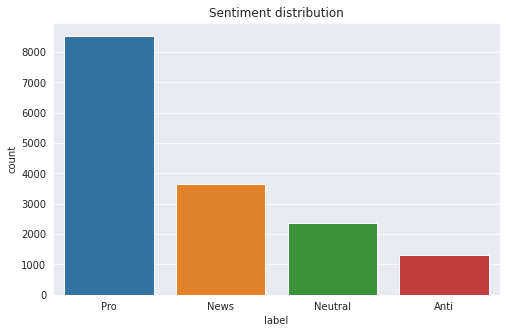

In [ ]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(combine["label"])
plt.title('Sentiment distribution')
plt.show()

So far, we have viewed the shapes of both the test and train dataset. We saw that the test set has a total of 10546 rows and 2 columns (message, tweetid), with the train having 15918 rows and 3 columns(sentiment, tweetid and message). Both datasets do not contain empty rows. When counting the frequency of each sentiments,it was observed that the **Pro tweets**, has a high frequency count of 8530.

##### Data Insights

In [ ]:
# Preview train dataset
combine[combine['sentiment']== -1].head() # View first rows of anit-climate change tweeets

,sentiment,message,tweetid,label
28,-1.0,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491,Anti
46,-1.0,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141,Anti
48,-1.0,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523,Anti
56,-1.0,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385,Anti
57,-1.0,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263,Anti


In [ ]:
combine[combine['sentiment']== 0].head() # View first rows of neutral tweeets

,sentiment,message,tweetid,label
19,0.0,Calum: *tweets abt reunitingish w the cast*\n-sees replies begging him to come to their countries-\nCalum: *goes back to rting climate change*,547924,Neutral
22,0.0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545,Neutral
30,0.0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051,Neutral
39,0.0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368,Neutral
43,0.0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916,Neutral


In [ ]:
combine[combine['sentiment']== 1].head() # View first rows of pro-climate change tweeets

,sentiment,message,tweetid,label
0,1.0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,Pro
1,1.0,It's not like we lack evidence of anthropogenic global warming,126103,Pro
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,Pro
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,Pro
5,1.0,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577,Pro


In [ ]:
combine[combine['sentiment']== 2].head() # View first rows of news tweeets

,sentiment,message,tweetid,label
2,2.0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,News
12,2.0,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673,News
14,2.0,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092,News
26,2.0,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291,News
32,2.0,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471,News


There appears to be an imbalance in the frequency of the sentiments in the train dataset. This would pose a problem when trainig the data as the model would be more familiar with the sentiment which has a higher frequency. To curb this issue, we would apply a resampling method called SMOTE.

The data insights highlighted above, gives some insight to what is in each row of text. The message column consists of unclean data that would be difficult to classify. Hence, in the next sub-head, we would look into text preprocessing.

## 4. Data Engineering

### Text Preprocessing

Taking a glance at the colums above, we notice a large occurence from the message column. **Text is an unstructured form of data**. Trying to classify the data as is would not be possible as algorithms for training can not do that. The best approach is noise removal and breaking the data down into forms that can be trained.

##### Noise removal

Real world data contains irrelevant or meaningless data termed as noise which can significantly affect various data analysis task in classifcation.To remove these noise we use regular expressions, a sequence of character(s) used to find and replace patterns in a string or file. Below is a list of the noises to be removed from the data:

- Converting all Characters to Lowercase
- Twitter handles
- URLs
- Hashtags
- duplicate whitespace
- 'rt'
- emojis or smileys

As part of the data cleaning process, we looked at **tokenisation, lemmanisation and stopwords removal.**

In [ ]:
#function cleans data using regular expression
def clean_data(data):
    i = 0
    for tweet in data['message']:
        tweet = tweet.lower()#converts to lowercase
        tweet = re.sub(r'http\S+', '', tweet) #removes hyperlinks
        tweet = re.sub(r'@\S+', '', tweet) #removes @username reference
        tweet = re.sub(r'[^\w\s]', '', tweet) #removes special characters
        tweet = re.sub(r'rt[\s]+', '', tweet) #Remove RT
        tweet = re.sub(r'[^a-zA-Z#]', ' ',tweet)#replaces all the emojis with whitespace
        tweet = tweet.lstrip()
        tweet = tweet.rstrip()
        tweet = tweet.replace('  ', ' ')
        data.loc[i, 'message'] = tweet
        i += 1

In [ ]:
clean_data(combine)
combine.head()

,sentiment,message,tweetid,label
0,1.0,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221,Pro
1,1.0,its not like we lack evidence of anthropogenic global warming,126103,Pro
2,2.0,researchers say we have three years to act on climate change before its too late,698562,News
3,1.0,todayinmaker wired was a pivotal year in the war on climate change,573736,Pro
4,1.0,its and a racist sexist climate change denying bigot is leading in the polls electionnight,466954,Pro


##### Tokenisation
A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". This method would be used to further clean data, making it ready for analysis. 

In [ ]:
tokeniser = TreebankWordTokenizer()#creating an instance of treebankwordtokenizer
combine['message'] = combine['message'].apply(tokeniser.tokenize)#applies the instance to the message column

##### Lemmatization

Lemmatization is technique used to reduce words to a normalized form. In lemmatization, uses a dictionary to map different variants of a word back to its root format.

In [ ]:
lemmatizer = WordNetLemmatizer()#creates a lemmatizer instance
def lemmas(tkns, lemmatizer):
    #function takes each token in the message column and finds its root word
    return [lemmatizer.lemmatize(tkn) for tkn in tkns]

In [ ]:
combine['message'] = combine['message'].apply(lemmas, args = (lemmatizer, ))#applies the function to the message column

##### Stopwords

Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. 

In [ ]:
stopwords = stopwords.words('english')# creates instance of stopword
def remove_stopwords(tnks):
    #function traverses through text and removes stopwords
    return [tnk for tnk in tnks if tnk not in stopwords]

In [ ]:
combine['message'] = combine['message'].apply(remove_stopwords)#applies the funtion to the message column
# converts the list into a string.
combine['message'] = [' '.join(map(str,l)) for l in combine['message']]

In [ ]:
combine.head()

,sentiment,message,tweetid,label
0,1.0,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait via,625221,Pro
1,1.0,like lack evidence anthropogenic global warming,126103,Pro
2,2.0,researcher say three year act climate change late,698562,News
3,1.0,todayinmaker wired wa pivotal year war climate change,573736,Pro
4,1.0,racist sexist climate change denying bigot leading poll electionnight,466954,Pro


After applying the stopwords method, we noticed a few words that can be considered as stopwords were not removed as there are some spelling errors that were not corrected.

In [ ]:
#removes words that are have a length less than 3
combine['message'] = combine['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 3]))
combine.head()

,sentiment,message,tweetid,label
0,1.0,polyscimajor chief doesnt think carbon dioxide main cause global warming wait,625221,Pro
1,1.0,like lack evidence anthropogenic global warming,126103,Pro
2,2.0,researcher three year climate change late,698562,News
3,1.0,todayinmaker wired pivotal year climate change,573736,Pro
4,1.0,racist sexist climate change denying bigot leading poll electionnight,466954,Pro


### Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. In this section, there would analysis of each sentiment based on word frequencies

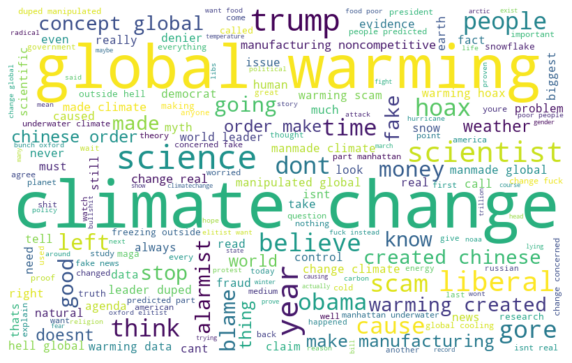

In [ ]:
#displays the most frequent words in the 'anti ' sentiment
anti = ' '.join([text for text in combine['message'][combine['sentiment']== -1]]) 
wordcloud = WordCloud(background_color='white', width=800,height=500, random_state=21,max_font_size=110).generate(anti)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

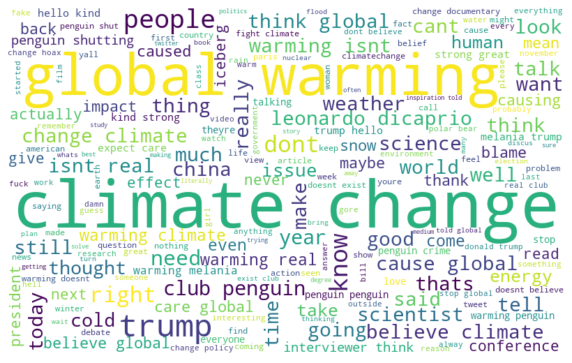

In [ ]:
#displays the most frequent words in the 'nuetral ' sentiment
neutral = ' '.join([text for text in combine['message'][combine['sentiment']== 0]]) 
wordcloud = WordCloud(background_color='white', width=800,height=500, random_state=21,max_font_size=110).generate(neutral)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

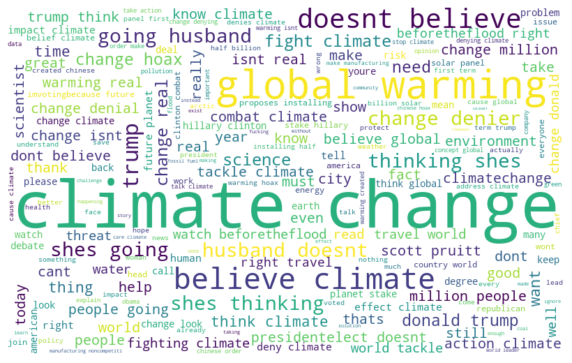

In [ ]:
#displays the most frequent words in the 'pro ' sentiment
pro = ' '.join([text for text in combine['message'][combine['sentiment']==1]]) 
wordcloud = WordCloud(background_color='white', width=800,height=500, random_state=21,max_font_size=110).generate(pro)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

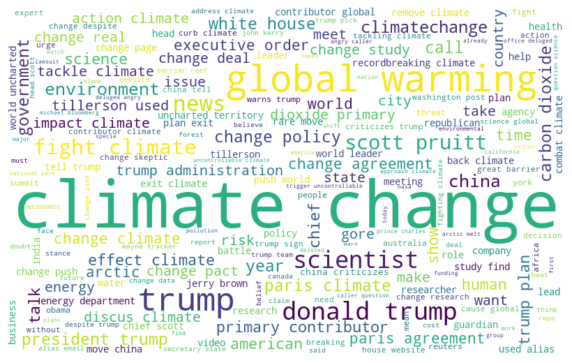

In [ ]:
#displays the most frequent words in the 'news ' sentiment
news = ' '.join([text for text in combine['message'][combine['sentiment']==2]]) 
wordcloud = WordCloud(background_color='white', width=800,height=500, random_state=21,max_font_size=110).generate(news)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

The images above, shows varying words per sentiment but it can be noticed that all sentiments have the following words (**global, warming, climate, change**) in high frequency. This may be because most users mention to words to make reference to the subject matter they are commenting on.

##### Word Frequency Distribution using bar plot

Below

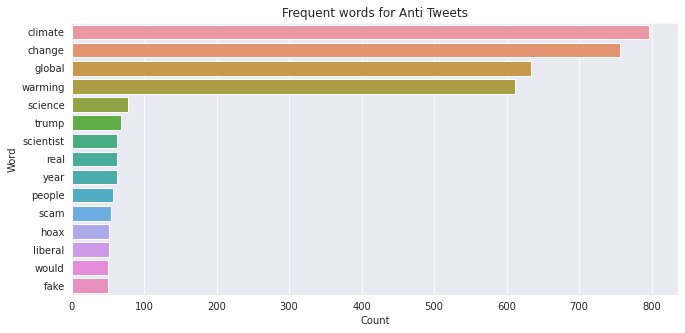

In [ ]:
#displays how frequently a word appears in 'anti' sentiment
anti = ' '.join([word for word in combine['message'][combine['sentiment'] == -1]])
plt.rcParams['figure.figsize'] = [50, 5]
plt.subplot(1, 4, 2)
f = nltk.FreqDist(anti.split(' '))
df = pd.DataFrame({'Word': list(f.keys()),'Count' : list(f.values())})
df = df.nlargest(columns='Count', n=15)
ax = sns.barplot(data=df, y='Word', x='Count')
plt.title('Frequent words for Anti Tweets')
plt.show()

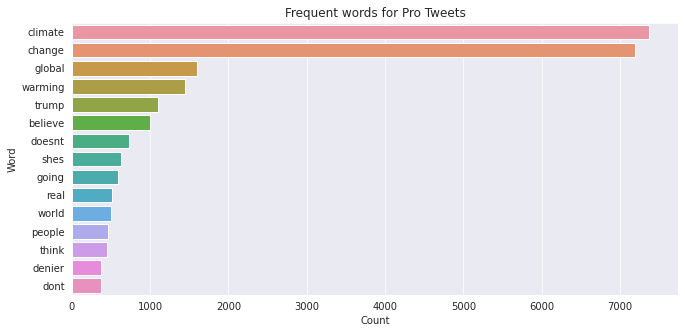

In [ ]:
#displays how frequently a word appears in 'pro' sentiment
pro = ' '.join([word for word in combine['message'][combine['sentiment'] == 1]])
plt.rcParams['figure.figsize'] = [50, 5]
plt.subplot(1, 4, 2)
f = nltk.FreqDist(pro.split(' '))
df = pd.DataFrame({'Word': list(f.keys()),'Count' : list(f.values())})
df = df.nlargest(columns='Count', n=15)
ax = sns.barplot(data=df, y='Word', x='Count')
plt.title('Frequent words for Pro Tweets')
plt.show()

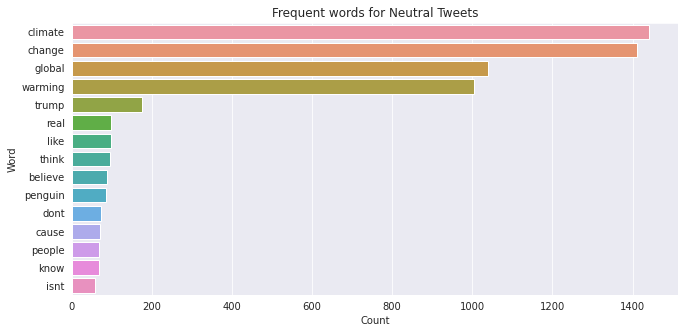

In [ ]:
#displays how frequently a word appears in 'neutral' sentiment
neutral = ' '.join([word for word in combine['message'][combine['sentiment'] == 0]])
plt.rcParams['figure.figsize'] = [50, 5]
plt.subplot(1, 4, 2)
f = nltk.FreqDist(neutral.split(' '))
df = pd.DataFrame({'Word': list(f.keys()),'Count' : list(f.values())})
df = df.nlargest(columns='Count', n=15)
ax = sns.barplot(data=df, y='Word', x='Count')
plt.title('Frequent words for Neutral Tweets')
plt.show()

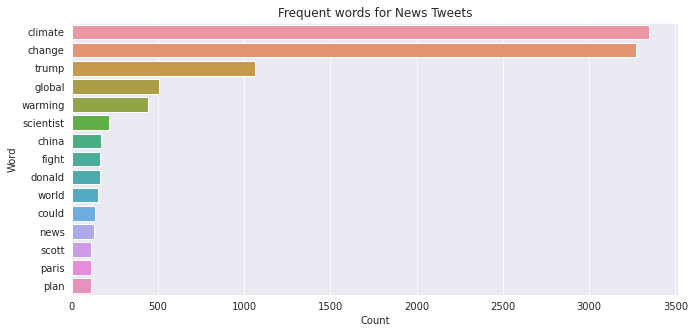

In [ ]:
#displays how frequently a word appears in 'news' sentiment
news = ' '.join([word for word in combine['message'][combine['sentiment'] == 2]])
plt.rcParams['figure.figsize'] = [50, 5]
plt.subplot(1, 4, 2)
f = nltk.FreqDist(news.split(' '))
df = pd.DataFrame({'Word': list(f.keys()),'Count' : list(f.values())})
df = df.nlargest(columns='Count', n=15)
ax = sns.barplot(data=df, y='Word', x='Count')
plt.title('Frequent words for News Tweets')
plt.show()

The bar plots are a reinforcement of the word clouds showed above. **Climate, Change, Global, Warning** are seen to have a higher frequency count compared to other words in the dataset. We also noticed the word Trump occurs more in the **News sentiment** and this is because at the time this data was collected Former American President Trump was President.

Earlier, we combined both test and train data to perform data engineering on both of them. Now we would split them in order to train our model as as well test.

In [ ]:
df_train = combine[~combine['sentiment'].isna()]#assigns to df_train columns where the sentiment is not null
df_test = combine[combine['sentiment'].isna()]#assigns to df_test columns where the sentiment is null
df_test = df_test.drop(columns = ['sentiment']) # Drop columns Sentiment and message from the df dataframe

In [ ]:
df_train.head()#displays first five rows for the train data

,sentiment,message,tweetid,label
0,1.0,polyscimajor chief doesnt think carbon dioxide main cause global warming wait,625221,Pro
1,1.0,like lack evidence anthropogenic global warming,126103,Pro
2,2.0,researcher three year climate change late,698562,News
3,1.0,todayinmaker wired pivotal year climate change,573736,Pro
4,1.0,racist sexist climate change denying bigot leading poll electionnight,466954,Pro


In [ ]:
df_test.head()#displays first five rows for the test data

,message,tweetid,label
15819,europe looking china make sure alone fighting climate change,169760,None
15820,combine polling staffer climate change woman right fascist state,35326,None
15821,scary unimpeachable evidence climate change already itstimetochange climatechange,224985,None
15822,putin jill trump doesnt believe climate change think hoax,476263,None
15823,female orgasm cause global warming sarcastic republican,872928,None


## 5. Modelling

From the EDA section above, we gained some interesting insights from the data. In this section we would look at balnacing the data, splitting the data and as well trainig the data with various models. 


In [ ]:
y = df_train['sentiment'] #assigns target variable to y

In [ ]:
cv = CountVectorizer()#create an instance of countvectorizer
X = cv.fit_transform(df_train['message'])#assigns 

Above we are assigning sentiment column (target) to Y and the message column (data) to X. CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It essentially allows us to classify text by converting them to vectors.

Before we split the data, remember we mentioned the data was imbalanced and using it as is would not give us efficient results.
We would applying a resampling method called SMOTE. 

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in a dataset in a balanced way. It works by generating new instances from existing minority cases that you supply as input.

In [ ]:
oversample = SMOTE(random_state = 42)#creates an instance smote
X_res, y_res = oversample.fit_resample(X, y)# fits and resamples both x and y

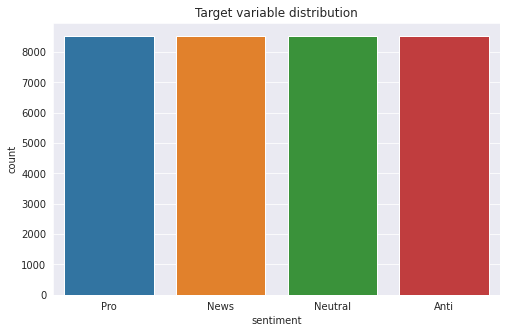

In [ ]:
# target distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(y_res)
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])
plt.title('Target variable distribution')
plt.show()

Using smote balanced the data and now we can proceed to training our model

##### Train-Test split

In [ ]:
# splitting data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((27296, 13861), (6824, 13861), (27296,), (6824,))

Now we create five distinct models.The models would be created using the data train set and evaluated using the test set. the target models include:

**1. Multinomial Naives Bayes Classifiers**

**2. Logistic Regression**

**3. Random Forest Classifier**

**4. Support Vector Classifier**

**5. K-nearest Neighbours**

##### Multinomial Naives Bayes Classifiers

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [ ]:
# model_naive = MultinomialNB().fit(X_train,y_train)
pred_naive = multinomial_nb_grid.best_estimator_.predict(X_test)

In [ ]:
# Measuring the accuracy of the model
naive_accuracy = accuracy_score(y_test, pred_naive)#calculates accuracy score
classificationreport =  classification_report(y_test, pred_naive)
print(confusion_matrix(y_test, pred_naive))#displays confusion matrix
print(f'Accuracy score: {naive_accuracy}')#displays accuracy score
print('\n')
print(f'{classificationreport}')

[[ 910  100   87  580]
 [ 436  465  139  618]
 [  93  173 1247  217]
 [  87   57  151 1464]]
Accuracy score: 0.5987690504103166


              precision    recall  f1-score   support

        -1.0       0.60      0.54      0.57      1677
         0.0       0.58      0.28      0.38      1658
         1.0       0.77      0.72      0.74      1730
         2.0       0.51      0.83      0.63      1759

    accuracy                           0.60      6824
   macro avg       0.61      0.59      0.58      6824
weighted avg       0.61      0.60      0.58      6824



##### Logistic Regression

In [ ]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

# Generate predictions
log_y_pred = logreg.predict(X_test)

# Measuring the accuracy of the model
log_accuracy = accuracy_score(y_test, log_y_pred)
classificationreport =  classification_report(y_test, log_y_pred)
print(confusion_matrix(y_test, log_y_pred))#displays confusion matrix
print(f'Accuracy score: {log_accuracy}')
print('\n')
print(f'{classificationreport}')

[[ 955  611   68   43]
 [ 433 1014  140   71]
 [  81  139 1339  171]
 [  87  332  125 1215]]
Accuracy score: 0.6628077373974208


              precision    recall  f1-score   support

        -1.0       0.61      0.57      0.59      1677
         0.0       0.48      0.61      0.54      1658
         1.0       0.80      0.77      0.79      1730
         2.0       0.81      0.69      0.75      1759

    accuracy                           0.66      6824
   macro avg       0.68      0.66      0.67      6824
weighted avg       0.68      0.66      0.67      6824



##### RandomForest Classifier 

In [ ]:
# Instantiating the model
rfc = RandomForestClassifier(max_depth = 200,n_estimators=300, random_state = 42)
rfc.fit(X_train, y_train)

# Making predictions
rfc_y_pred = rfc.predict(X_test)

# Measuring the accuracy of the model
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
classificationreport =  classification_report(y_test, rfc_y_pred)
print(confusion_matrix(y_test, rfc_y_pred))#displays confusion matrix
print(f'Accuracy score: {rfc_accuracy}')
print('\n')
print(f'{classificationreport}')

[[1001  589   34   53]
 [ 463 1011   67  117]
 [ 197  207  949  377]
 [  86  351   49 1273]]
Accuracy score: 0.6204572098475967


              precision    recall  f1-score   support

        -1.0       0.57      0.60      0.58      1677
         0.0       0.47      0.61      0.53      1658
         1.0       0.86      0.55      0.67      1730
         2.0       0.70      0.72      0.71      1759

    accuracy                           0.62      6824
   macro avg       0.65      0.62      0.62      6824
weighted avg       0.65      0.62      0.63      6824



##### Support Vector Classifier

In [ ]:
param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

grid.fit(X_train,y_train)
# grid.best_params_
SVC_y_pred = grid.predict(X_test)

# Measuring the accuracy of the model
svc_accuracy = accuracy_score(y_test, SVC_y_pred)
classificationreport =  classification_report(y_test, SVC_y_pred)
print(confusion_matrix(y_test, SVC_y_pred))#displays confusion matrix
print(f'Accuracy score: {svc_accuracy}')
print('\n')
print(f'{classificationreport}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  58.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  54.4s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  50.5s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  47.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  48.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  46.5s
[CV] END ......................C=1, gamma=0.1, ke

##### K-nearest neighbours

In [ ]:
n_neighbors = 2 # <--- change this number to play around with how many nearest neighbours to look for.

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)

KN_y_pred = knn.predict(X_test)

# Measuring the accuracy of the model
KNN_accuracy = accuracy_score(y_test, KN_y_pred)
classificationreport =  classification_report(y_test, KN_y_pred)
print(confusion_matrix(y_test, KN_y_pred))#displays confusion matrix
print(f'Accuracy score: {KNN_accuracy}')
print('\n')
print(f'{classificationreport}')

[[1201  439    2   35]
 [ 762  819    4   73]
 [ 593  377  432  328]
 [ 470  134   25 1130]]
Accuracy score: 0.5249120750293084


              precision    recall  f1-score   support

        -1.0       0.40      0.72      0.51      1677
         0.0       0.46      0.49      0.48      1658
         1.0       0.93      0.25      0.39      1730
         2.0       0.72      0.64      0.68      1759

    accuracy                           0.52      6824
   macro avg       0.63      0.53      0.52      6824
weighted avg       0.63      0.52      0.52      6824



## 6. Model Performance

In [ ]:
performance = {
    'model': ['Multinomial Naives Bayes', 'Logistic Regression','Random Forest Classifier', 'Support Vector Machine', 'K-nearest Neighbour'],
    'accuracy': [ naive_accuracy, log_accuracy, rfc_accuracy, svc_accuracy, KNN_accuracy]
}
print(performance)

{'model': ['Multinomial Naives Bayes', 'Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine', 'K-nearest Neighbour'], 'accuracy': [0.5987690504103166, 0.6628077373974208, 0.6204572098475967, 0.6652989449003517, 0.5249120750293084]}


In [ ]:
df = pd.DataFrame(performance)
df

,model,accuracy
0,Multinomial Naives Bayes,0.598769
1,Logistic Regression,0.662808
2,Random Forest Classifier,0.620457
3,Support Vector Machine,0.665299
4,K-nearest Neighbour,0.524912


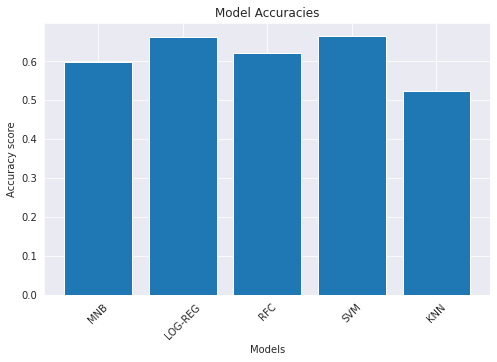

In [ ]:
x = ['MNB', 'LOG-REG', 'RFC', 'SVM', 'KNN' ]
y = [naive_accuracy, log_accuracy,rfc_accuracy, svc_accuracy, KNN_accuracy]
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.xticks(rotation = 45) 
plt.title('Model Accuracies')
plt.show()

## Model Explanation

The aim of this project, is to classify the belief of a tweeter user on the matter of climate change. We addressed this taks by first viewing the information on the datasets given. We cleaned the data using the various NLP methods(tokenisation, lemmanization, stopwords removal). We also applied regular expression to remove noises in the data. 

Further in our analysis, we observed an imbalance in the data. It showed that more users fall under the category of PRO sentiments(those that believe in climate change). To sort the problem of imbalance, we applied a method called SMOTE.

Before we trained our model, we used the Countvectorizer to transform our x variable(message) in to vectors, based on the frequency of words in the text. This is so our modeling algorithms can classify our data properly.

For our modelling process, we used five models:

**1. Multinomial Naives Bayes Classifiers**

**2. Logistic Regression**

**3. Random Forest Classifier**

**4. Support Vector Classifier**

**5. K-nearest Neighbours**

Of all the models, we applied gridsearch to the Support Vector Classifier, which gave us a better accuracy score. But this method took minutes to train and fit the model as well as produce an output but it did give a better result.

For all our models, we used all the features.

As much as this project does not directly give a percentage of users who are pro climate change, anti climate change , neutral to it or if they are a news channel, it gives a 70% accuracy on the class they belong to based on what they type.


##### Kaggle Submission

In [ ]:
# transforming test dataset
test_vecto = cv.transform(df_test['message'].values)

In [ ]:
predict = grid.predict(test_vecto)

In [ ]:
submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment': predict})
submission.head()

,tweetid,sentiment
15819,169760,1.0
15820,35326,1.0
15821,224985,1.0
15822,476263,0.0
15823,872928,0.0


##### End of Comet

In [ ]:
# creating dictionaries for data 

params = {
            'C': 10,
            'gamma': 0.1, 
            'kernel': 'rbf',
            'model_type': 'Support vector classifier'
           
}

metrics = {
            'accuracy' : svc_accuracy,
            'clasification report': classificationreport 
}

In [ ]:
# logging parameters and results

experiment.log_parameters(params)
experiment.log_metrics(metrics)


COMET WARNING: Converting metric value ''              precision    recall  f1-score   support\n\n        -1.0       0.40      0.72      0.51      1677\n         0.0       0.46      0.49      0.48      1658\n         1.0       0.93      0.25      0.39      1730\n         2.0       0.72      0.64      0.68      1759\n\n    accuracy                           0.52      6824\n   macro avg       0.63      0.53      0.52      6824\nweighted avg       0.63      0.52      0.52      6824\n'' into a string using str(), resulting string might be invalid


In [ ]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mcmunashe/advanced-classification-predict-on-climate-change/5c0b8c501b0241e8a2bdb1e763bd3f53
COMET INFO:   Metrics:
COMET INFO:     accuracy             : 0.6652989449003517
COMET INFO:     clasification report :               precision    recall  f1-score   support

        -1.0       0.40      0.72      0.51      1677
         0.0       0.46      0.49      0.48      1658
         1.0       0.93      0.25      0.39      1730
         2.0       0.72      0.64      0.68      1759

    accuracy                           0.52      6824
   macro avg       0.63      0.53      0.52      6824
weighted avg       0.63      0.52      0.52      6824

COMET INFO:   Others:
COMET INFO:     notebook